In [2]:
import cv2
from utils import PSNR
from forward import image_gen_emb_w
from matplotlib import pyplot as plt
import numpy as np
from recovery import stage_1_recovery

In [3]:
image1 = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\\Data\\Lenna.png",0)
w_image1 = image_gen_emb_w(image1,137)
image2 = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\\Data\\airplane.png",0)
w_image2 = image_gen_emb_w(image2,137)
image3 = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\\Data\\Lake_original.png",0)
w_image3 = image_gen_emb_w(image3,137)
image4 = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\\Data\\peppers.png",0)
w_image4 = image_gen_emb_w(image4,137)
print("PSNR1",cv2.PSNR(image1,w_image1))
print("PSNR2",cv2.PSNR(image2,w_image2))
print("PSNR3",cv2.PSNR(image3,w_image3))
print("PSNR4",cv2.PSNR(image4,w_image4))

PSNR1 40.7391606453958
PSNR2 40.69868474003894
PSNR3 40.72812565580446
PSNR4 40.7245057268029


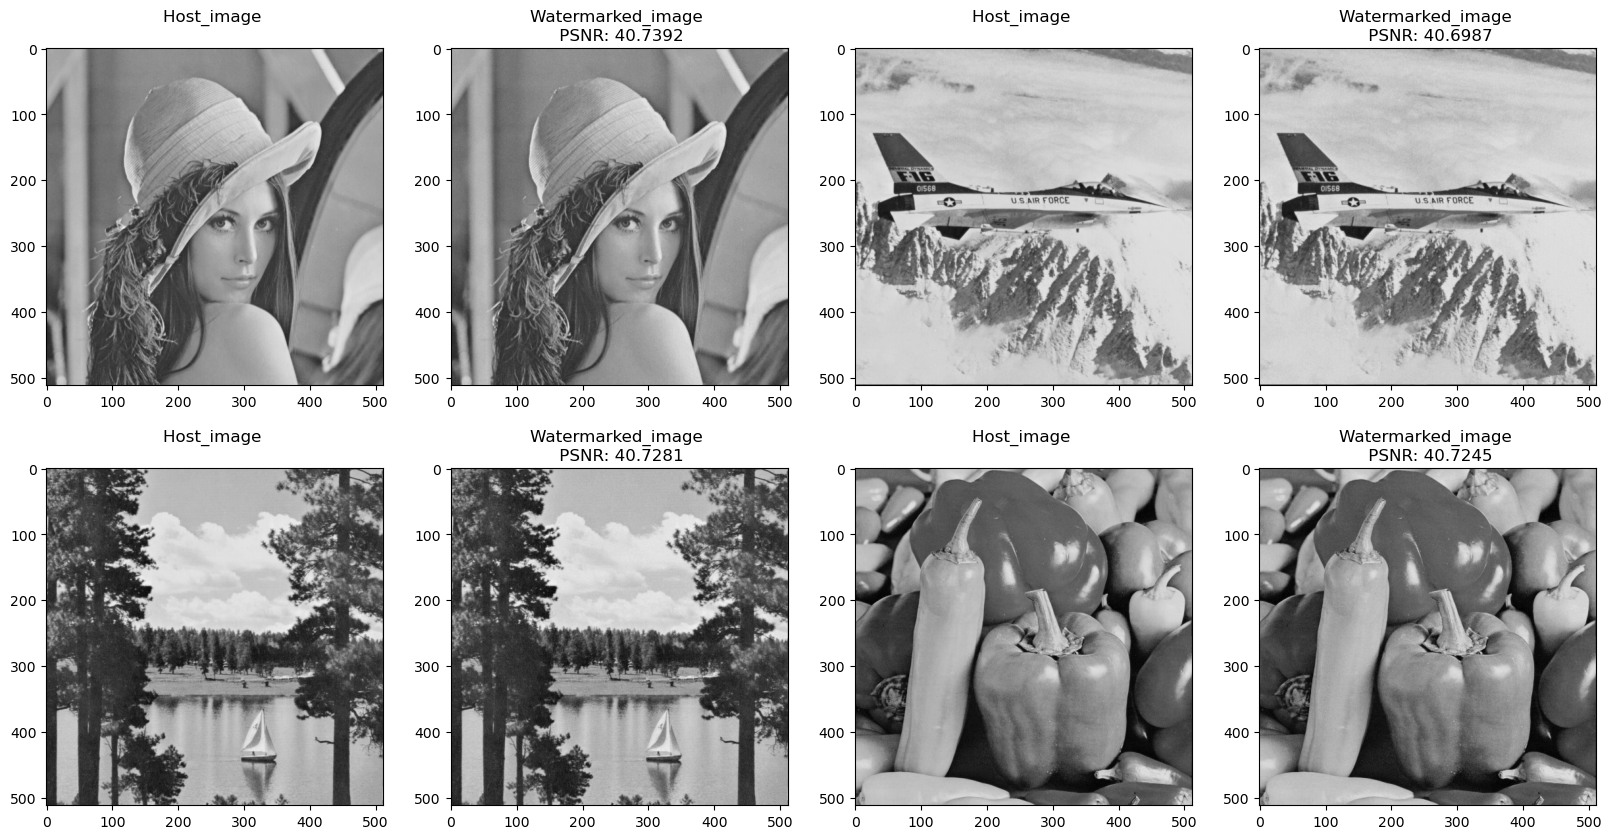

In [4]:
w_str1 = f'PSNR: {PSNR(image1,w_image1):.4f}'
w_str2 = f'PSNR: {PSNR(image2,w_image2):.4f}'
w_str3 = f'PSNR: {PSNR(image3,w_image3):.4f}'
w_str4 = f'PSNR: {PSNR(image4,w_image4):.4f}'
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 4,figsize = (20,10))

axes[0,0].set_title('Host_image \n')
axes[0,1].set_title(f'Watermarked_image \n {w_str1}')
axes[0,0].imshow(image1, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,1].imshow(w_image1, cmap=plt.cm.gray,vmax=255,vmin=0)

axes[0,2].set_title('Host_image \n')
axes[0,3].set_title(f'Watermarked_image \n {w_str2}')
axes[0,2].imshow(image2, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,3].imshow(w_image2, cmap=plt.cm.gray,vmax=255,vmin=0)

axes[1,0].set_title('Host_image \n')
axes[1,1].set_title(f'Watermarked_image \n {w_str3}')
axes[1,0].imshow(image3, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,1].imshow(w_image3, cmap=plt.cm.gray,vmax=255,vmin=0)

axes[1,2].set_title('Host_image \n')
axes[1,3].set_title(f'Watermarked_image \n {w_str4}')
axes[1,2].imshow(image4, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,3].imshow(w_image4, cmap=plt.cm.gray,vmax=255,vmin=0)


In [5]:
tamper_image = w_image1.copy()
tamper_image[:,256:]= np.zeros((512,256),dtype=np.uint8) 

In [6]:
from detect import *
detec_1 = level_one_detection(tamper_image)
detec_2 = level_two_detection(detec_1)
detec_3 = level_three_detection(detec_2)

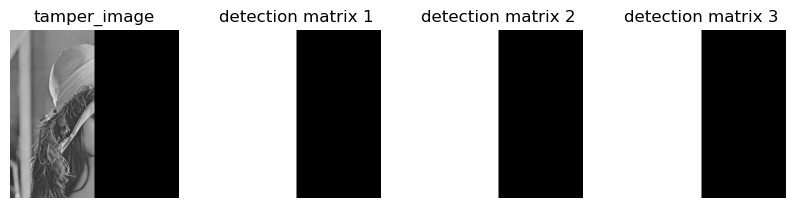

In [7]:
fig, axes = plt.subplots(1, 4,figsize = (10,10))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()
axes[3].set_axis_off()

axes[0].set_title(f'tamper_image')
axes[1].set_title(f'detection matrix 1')
axes[2].set_title(f'detection matrix 2')
axes[3].set_title(f'detection matrix 3')

axes[0].imshow(tamper_image, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(detec_1, cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2].imshow(detec_2, cmap=plt.cm.gray,vmax=1,vmin=0)
axes[3].imshow(detec_3, cmap=plt.cm.gray,vmax=1,vmin=0)


In [9]:
r_image1,detec_4 = stage_1_recovery(tamper_image,137)

[1 0 0 1 0 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 1 0 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 1 0 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 1 0 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0]
[0 1 1 1 1 0 0 0]
[0 1 1 1 1 0 0 0]
[0 1 1 1 1 0 0 0]
[0 1 1 1 0 0 0 0]
[0 1 1 1 1 0 0 0]
[1 0 0 0 0 0 0 0]
[1 0 0 0 1 0 0 0]
[1 0 0 1 0 0 0 0]
[1 0 0 1 0 0 0 0]
[1 0 0 1 1 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 0 1 1 0 0 0]
[1 0 0 1 1 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 0 1 0 0

In [10]:
recovery_str1 = f'PSNR: {PSNR(image1,r_image1):.4f}'

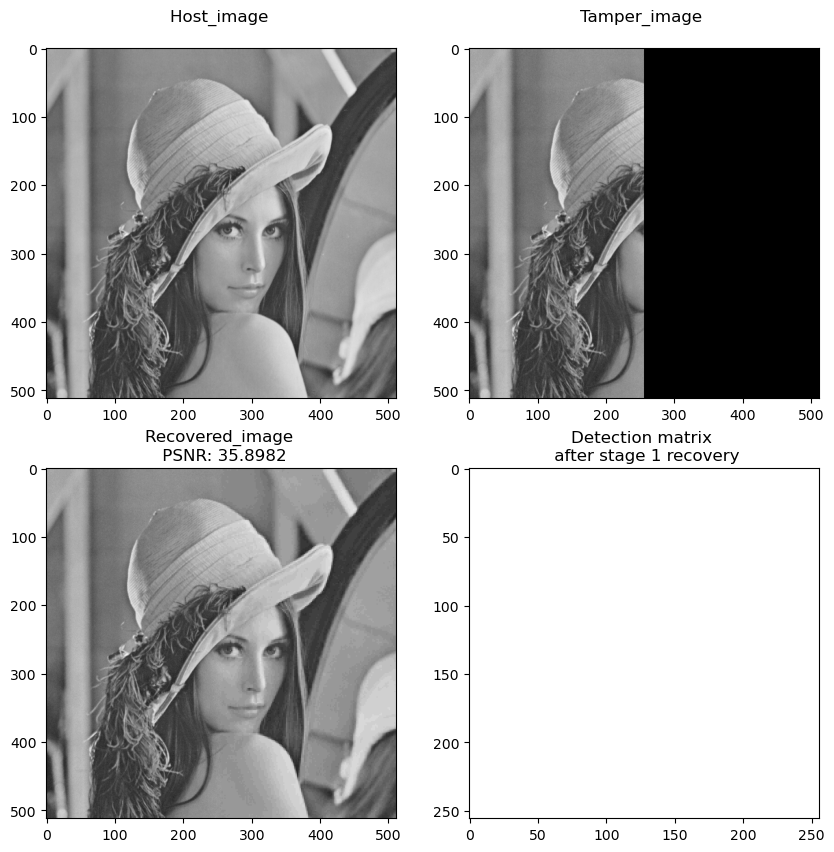

In [14]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 2,figsize = (10,10))

axes[0,0].set_title('Host_image \n')
axes[0,1].set_title(f'Tamper_image \n')
axes[0,0].imshow(image1, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,1].imshow(tamper_image, cmap=plt.cm.gray,vmax=255,vmin=0)

axes[1,0].set_title(f'Recovered_image \n {recovery_str1}')
axes[1,1].set_title(f'Detection matrix \n after stage 1 recovery')
axes[1,0].imshow(r_image1, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,1].imshow(detec_4, cmap=plt.cm.gray,vmax=1,vmin=0)